# Exploratory Data Analysis on World Suicide Rates from 1985 to 2016

## Resources and Information Used

* [Dataset](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)
* [Cleaning and Prepping Data with Python for Data Science](https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3)
* [Detailed Exploratory Data Analysis with Python ](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)


The purpose of this project is to aid in suicide prevention by looking for useful patterns/correlations amongst different demographics worldwide as it relates to suicide rates.

## What questions do I hope to answer?

* Is there a correlation between the suicide rate and different generations?
* What is the correlation between the suicide rate and GDP if any?
* Are there any countries with significantly higher suicide rates than others?
* How does the suicide rate compare amongst the male and female population?
* What is the correlation between the human development index and suicide rates?

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import plotly 
import numpy as np 

### Inspecting/Cleaning the data 

In [2]:
#insert the data into a pandas dataframe
df = pd.read_csv('master.csv')
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
#check column names
col_names = df.columns
print(col_names)

#get datatypes for each column
df.info()

Index([u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k pop', u'country-year', u'HDI for year',
       u' gdp_for_year ($) ', u'gdp_per_capita ($)', u'generation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
#need to get rid of columns with too many NaN values
del df["HDI for year"]
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64


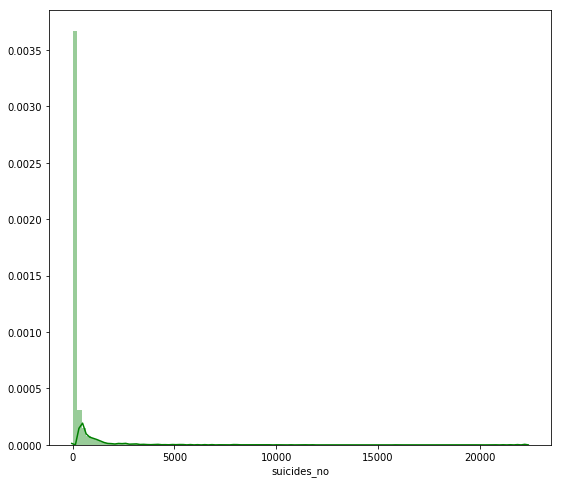

In [12]:
#looking at suicide no distribution

print(df['suicides_no'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['suicides_no'], color='g', bins=100, hist_kws={'alpha': 0.4});

**Note**:My data is definitely skewed so I'm going to work on getting rid of the outliers for a more accurate analysis.